## Assignment 1: Data Collection and Preparation

 ### This Assignment is being conducted by Yichen Wang and Scott Curtis - COMP47670 Data Science in Python

In [2]:
import numpy as np
import pandas as pd
import json
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Task 1: Identify API's

###   This dataset is a listing of all current employees working in Chicago. Complete with full names, departments, positions, employment status (part-time or full-time), frequency of hourly employee –where applicable—and annual salaries or hourly rate. For hourly employees, the city is providing the hourly rate and frequency of hourly employees (40, 35, 20 and 10). Please note, usually full-time employees work between 35- 40 hours per week and anything less than this is considered part-time. This is to allow users to estimate annual wages for hourly employees. Please note that annual wages will vary by employee, depending on number of hours worked and seasonal status.

In [3]:
url = "https://data.cityofchicago.org/api/views/xzkq-xp2w/rows.json?accessType=DOWNLOAD" 
print(url)
response = urllib.request.urlopen(url)
raw_json = response.read().decode("utf-8")
data = json.loads(raw_json)
#Get the API and JSON file and convert into python
data



https://data.cityofchicago.org/api/views/xzkq-xp2w/rows.json?accessType=DOWNLOAD


{'data': [['row-jvj4-yjzw-2cdp',
   '00000000-0000-0000-A8F9-D7D1E1CF0AFF',
   0,
   1541623617,
   None,
   1541623617,
   None,
   '{ }',
   'AARON,  JEFFERY M',
   'SERGEANT',
   'POLICE',
   'F',
   'Salary',
   None,
   '101442.00',
   None],
  ['row-76ev.bkjg-wtaj',
   '00000000-0000-0000-0BCA-044114E7813E',
   0,
   1541623617,
   None,
   1541623617,
   None,
   '{ }',
   'AARON,  KARINA ',
   'POLICE OFFICER (ASSIGNED AS DETECTIVE)',
   'POLICE',
   'F',
   'Salary',
   None,
   '94122.00',
   None],
  ['row-4apq-wjq6~c2iy',
   '00000000-0000-0000-A28B-7ADA81F6803C',
   0,
   1541623617,
   None,
   1541623617,
   None,
   '{ }',
   'AARON,  KIMBERLEI R',
   'CHIEF CONTRACT EXPEDITER',
   'GENERAL SERVICES',
   'F',
   'Salary',
   None,
   '101592.00',
   None],
  ['row-gcw4~zjrm-zawc',
   '00000000-0000-0000-C4AA-1B3E82C710B8',
   0,
   1541623617,
   None,
   1541623617,
   None,
   '{ }',
   'ABAD JR,  VICENTE M',
   'CIVIL ENGINEER IV',
   'WATER MGMNT',
   'F',
   'Salar

# Task 2: Collect the data from the chosen API using Python and clean it

In [4]:
df = pd.DataFrame(data['data'])

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,row-jvj4-yjzw-2cdp,00000000-0000-0000-A8F9-D7D1E1CF0AFF,0,1541623617,None,1541623617,None,{ },"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,None,101442.00,None
1,row-76ev.bkjg-wtaj,00000000-0000-0000-0BCA-044114E7813E,0,1541623617,None,1541623617,None,{ },"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,None,94122.00,None
2,row-4apq-wjq6~c2iy,00000000-0000-0000-A28B-7ADA81F6803C,0,1541623617,None,1541623617,None,{ },"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,None,101592.00,None
3,row-gcw4~zjrm-zawc,00000000-0000-0000-C4AA-1B3E82C710B8,0,1541623617,None,1541623617,None,{ },"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,None,110064.00,None
4,row-asif_8ezw-6kc7,00000000-0000-0000-8B2D-ADBC971AC2DB,0,1541623617,None,1541623617,None,{ },"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20,None,19.86


In [6]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4     33183
5         0
6     33183
7         0
8         0
9         0
10        0
11        0
12        0
13    25161
14     8022
15    25161
dtype: int64

### Clean the raw data of any noise, drop the meanless column, then give each column a name.

In [7]:
df = df.drop([0,1,2,3,4,5,6,7], axis=1) #drop the first 7 headings until we reach the names

In [8]:
df = df.rename(index=str, columns={8: "Name", 9: "Job Titles",10:"Department",11:"Full or Part-Time",12:"Salary or Hourly",13:"Typical Hours",14:"Annual Salary",15:"Hourly Rate"})
#rename all the columns

In [9]:
df.head() #the cleaned dataset

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,None,101442.00,None
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,None,94122.00,None
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,None,101592.00,None
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,None,110064.00,None
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20,None,19.86


In [10]:
df.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33183 entries, 0 to 33182
Data columns (total 8 columns):
Name                 33183 non-null object
Job Titles           33183 non-null object
Department           33183 non-null object
Full or Part-Time    33183 non-null object
Salary or Hourly     33183 non-null object
Typical Hours        8022 non-null object
Annual Salary        25161 non-null object
Hourly Rate          8022 non-null object
dtypes: object(8)
memory usage: 2.3+ MB


# Task 3: Parse the collected dataset into two sub datasets. One subset is paid by salary, the other is paid hourly

In [12]:
def save_df_to_csv(df, filename): # save dataframe to csv
    df.to_csv(filename)

In [13]:
df_Salary = df[df['Salary or Hourly'] != "Hourly"]
df_Salary = df_Salary.dropna(axis='columns')
 # get all the data about jobs paid by salary 
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25161 entries, 0 to 33182
Data columns (total 6 columns):
Name                 25161 non-null object
Job Titles           25161 non-null object
Department           25161 non-null object
Full or Part-Time    25161 non-null object
Salary or Hourly     25161 non-null object
Annual Salary        25161 non-null object
dtypes: object(6)
memory usage: 1.3+ MB


In [14]:
#convert object into numeric value
df_Salary = df_Salary.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [15]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25161 entries, 0 to 33182
Data columns (total 6 columns):
Name                 25161 non-null object
Job Titles           25161 non-null object
Department           25161 non-null object
Full or Part-Time    25161 non-null object
Salary or Hourly     25161 non-null object
Annual Salary        25161 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [16]:
df_Salary.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,101442.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,101592.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,110064.0
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,50436.0


In [17]:
df_Hourly = df[df['Salary or Hourly'] != "Salary"]
df_Hourly = df_Hourly.drop(["Annual Salary"], axis=1)
#get all the data about jobs paid by hours

In [18]:
df_Hourly.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20,17.68


In [19]:
#convert object into numeric value
df_Hourly = df_Hourly.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [20]:
df_Hourly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8022 entries, 4 to 33175
Data columns (total 7 columns):
Name                 8022 non-null object
Job Titles           8022 non-null object
Department           8022 non-null object
Full or Part-Time    8022 non-null object
Salary or Hourly     8022 non-null object
Typical Hours        8022 non-null int64
Hourly Rate          8022 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 501.4+ KB


# Task 4: Analyze each subdataset

### We get the average salary from each department that is annually paid

In [21]:
df_Salary.groupby("Department")['Annual Salary'].mean()

Department
ADMIN HEARNG             78683.692308
ANIMAL CONTRL            66197.612903
AVIATION                 78750.549324
BOARD OF ELECTION        53548.149533
BOARD OF ETHICS          95061.000000
BUDGET & MGMT            91836.545455
BUILDINGS                99246.761041
BUSINESS AFFAIRS         80577.073171
CITY CLERK               70899.392857
CITY COUNCIL             64482.566801
COMMUNITY DEVELOPMENT    88430.778325
COPA                     76150.034483
CULTURAL AFFAIRS         89566.551724
DISABILITIES             83879.571429
DoIT                     99978.060606
FAMILY & SUPPORT         79895.762195
FINANCE                  73781.255814
FIRE                     97958.600811
GENERAL SERVICES         83545.057116
HEALTH                   85557.501031
HUMAN RELATIONS          94819.500000
HUMAN RESOURCES          80230.560000
INSPECTOR GEN            79874.758621
LAW                      85958.321526
LICENSE APPL COMM        84420.000000
MAYOR'S OFFICE           98186.142857
O

### Below is a barchart of average salaries in various industries

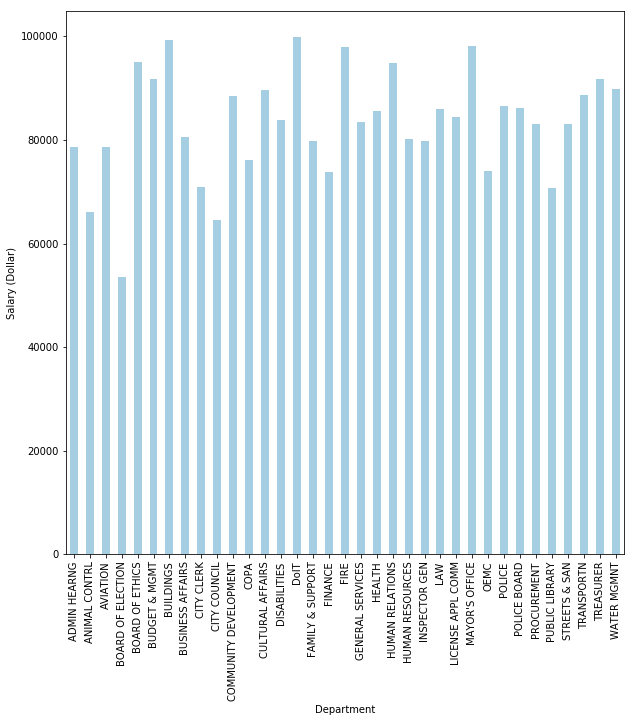

In [22]:
plt.figure(figsize=(10,10))
df_Salary_Vmean = df_Salary.groupby("Department")['Annual Salary'].mean()

#make color look the same to avoid color blind.
plt.ylabel("Salary (Dollar)")
plt.xlabel("Department")
df_Salary_Vmean.plot.bar(colormap='Paired')

From the above barchart, we see that the average highest salary is in the DoIT industry

Text(0, 0.5, 'Dollar')

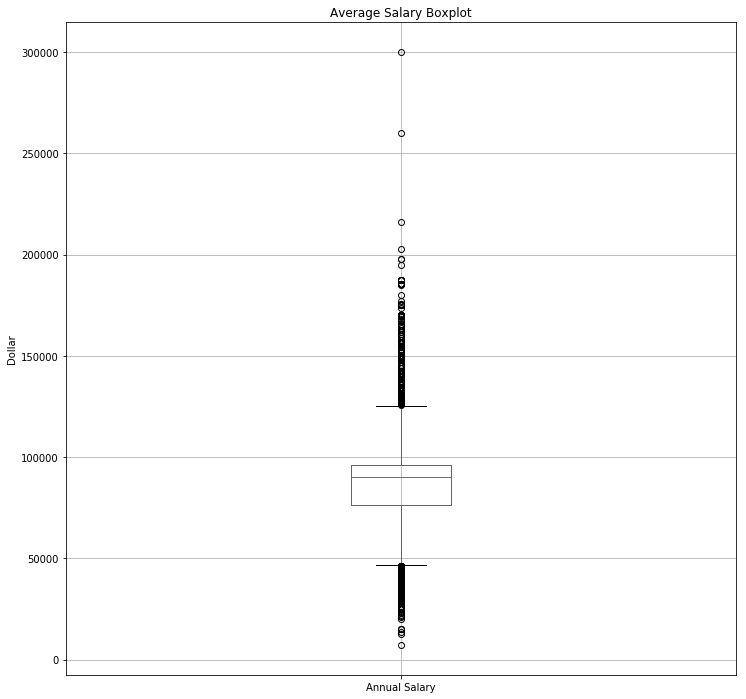

In [23]:

df_Salary.boxplot(figsize=(12,12))
plt.title("Average Salary Boxplot")
plt.ylabel("Dollar")

In [24]:
#we get the average salary
df_Salary.mean()


Annual Salary    86786.99979
dtype: float64

In [25]:
#We get the maxium salary
df_Salary.max()

Name                 ZYSKOWSKI,  DARIUSZ 
Job Titles           ZONING PLAN EXAMINER
Department                    WATER MGMNT
Full or Part-Time                       P
Salary or Hourly                   Salary
Annual Salary                      300000
dtype: object

In [26]:
#we get the minium salary
df_Salary.min()

Name                            AARON,  JEFFERY M
Job Titles           1ST DEPUTY INSPECTOR GENERAL
Department                           ADMIN HEARNG
Full or Part-Time                               F
Salary or Hourly                           Salary
Annual Salary                                7200
dtype: object

Text(0, 0.5, 'dollar')

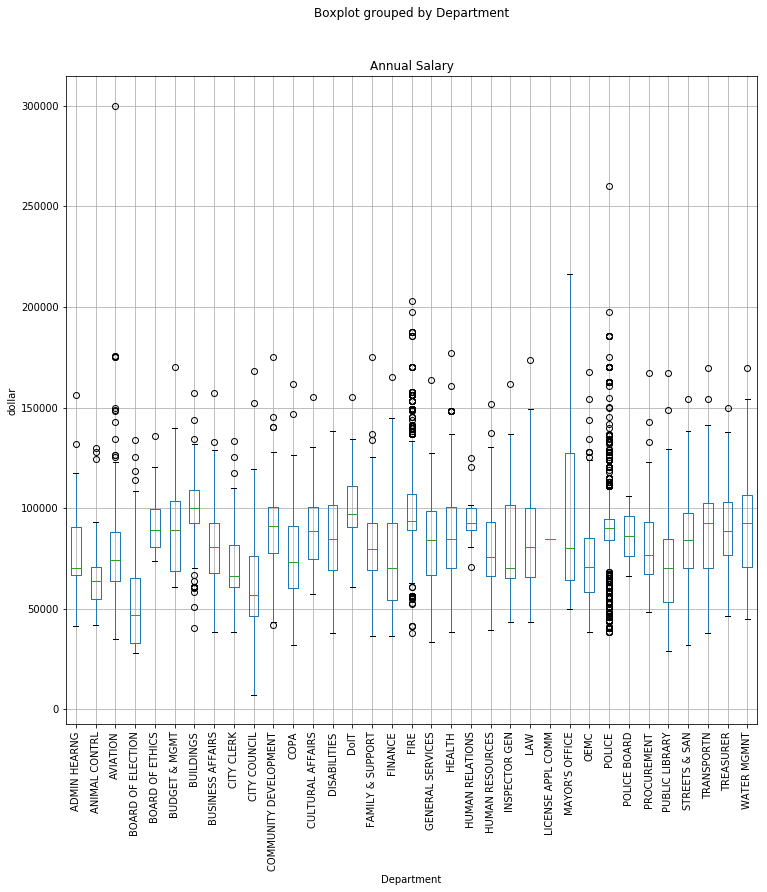

In [27]:
df_Salary.boxplot(column=['Annual Salary'],by='Department',figsize=(12,12),rot=90)
plt.ylabel("dollar")

In [28]:
df_Salary_Vmean.idxmax()

'DoIT'

#### The highest annual salary the dataset is in DoIT department

In [29]:
df_Salary_Vmean.max()

99978.06060606061

#### The highest average salary is $99,978.06

### Hourly paid average salary by each department

In [30]:
df_Hourly.groupby("Department")['Hourly Rate'].mean()


Department
ANIMAL CONTRL            24.780000
AVIATION                 35.633909
BUDGET & MGMT            13.000000
BUSINESS AFFAIRS         13.768571
CITY COUNCIL             15.112969
COMMUNITY DEVELOPMENT    30.302500
CULTURAL AFFAIRS         11.857143
FAMILY & SUPPORT          5.345679
FINANCE                  32.090909
FIRE                     40.200000
GENERAL SERVICES         41.775503
HEALTH                   81.953333
HUMAN RESOURCES          10.000000
LAW                      15.289250
MAYOR'S OFFICE           20.000000
OEMC                     19.466363
POLICE                    9.384000
PROCUREMENT              40.750000
PUBLIC LIBRARY           16.612274
STREETS & SAN            33.728378
TRANSPORTN               41.552110
WATER MGMNT              42.178698
Name: Hourly Rate, dtype: float64

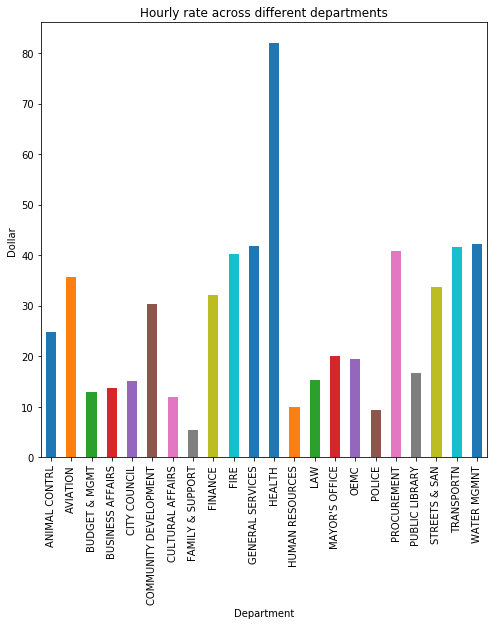

In [31]:
plt.figure(figsize=(8,8))
df_Hourly_Vmean = df_Hourly.groupby("Department")['Hourly Rate'].mean()
plt.title("Hourly rate across different departments")
plt.ylabel("Dollar")
df_Hourly_Vmean.plot.bar()

We see from the above barchat that the highest hourly wage in Chicago is in the Health Industry

In [32]:
df_Hourly_Vmean.max()

81.95333333333333

Text(0, 0.5, 'dollar')

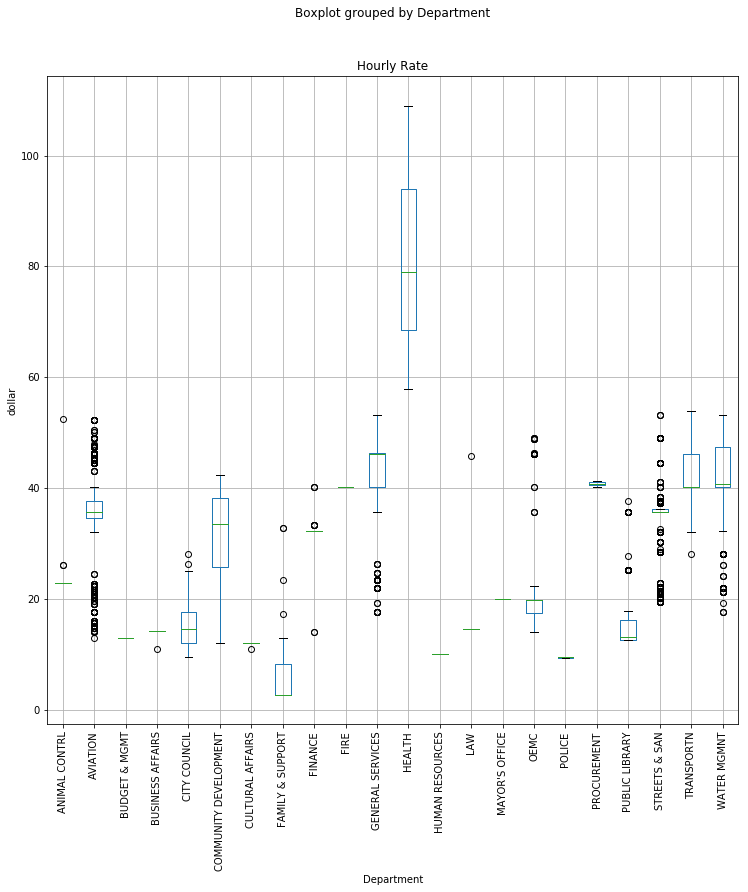

In [33]:
df_Hourly.boxplot(column=['Hourly Rate'],by='Department',figsize=(12,12),rot=90)
plt.ylabel("dollar")

 From the above boxplot we can see that people who work in Health have a higher hourly wage on average

In [34]:
df_Hourly.groupby("Full or Part-Time")['Hourly Rate'].mean()

Full or Part-Time
F    38.287220
P    17.191923
Name: Hourly Rate, dtype: float64

### Datarame of the average hourly salary by full time or part time, we can tell, part time has a lower salary.

In [55]:
df_Hourly.groupby("Full or Part-Time")['Name'].count()

pandas.core.series.Series

Text(0.5, 0, 'Ratio between full time and part time')

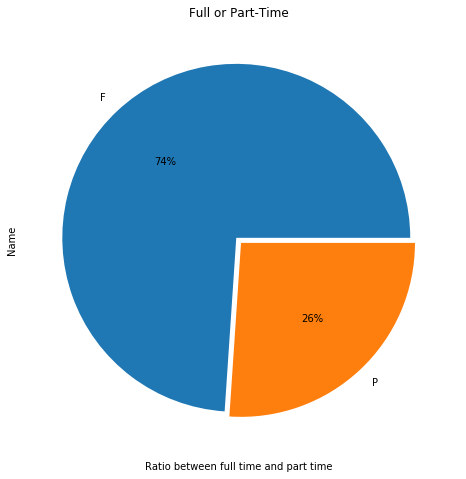

In [61]:
df_Hourly_pie = df_Hourly.groupby("Full or Part-Time")['Name'].count()
df_Hourly_pie.plot.pie(figsize=(8, 8),autopct='%1.0f%%',explode=(0.02,0.02))
plt.title("Full or Part-Time")
plt.xlabel("Ratio between full time and part time")


#### From the hourly paid dataset there are 5931 full time jobs and 2091 part time jobs

In [37]:
df_Salary.groupby("Full or Part-Time")['Annual Salary'].mean()

Full or Part-Time
F    86793.064181
P    10500.000000
Name: Annual Salary, dtype: float64

In [38]:
df_Salary.groupby("Full or Part-Time").count()

,Name,Job Titles,Department,Salary or Hourly,Annual Salary
Full or Part-Time,,,,,
F,25159,25159,25159,25159,25159
P,2,2,2,2,2


### From the annually paid dataset there are only 2 part time jobs, therefore we can tell that a person on an annual salary is more likely to be employed full time

In [39]:
df_Hourly.groupby(['Full or Part-Time','Typical Hours']).size().unstack(fill_value=0).add_prefix('Typical Hours')

Typical Hours,Typical Hours10,Typical Hours20,Typical Hours35,Typical Hours40
Full or Part-Time,,,,
F,2,1,96,5832
P,182,1900,8,1


### From this dataframe we can tell that as for hourly paid jobs, the most typical employment is 40 hours and for part-time employment the most common amount of hours is 20 hours.

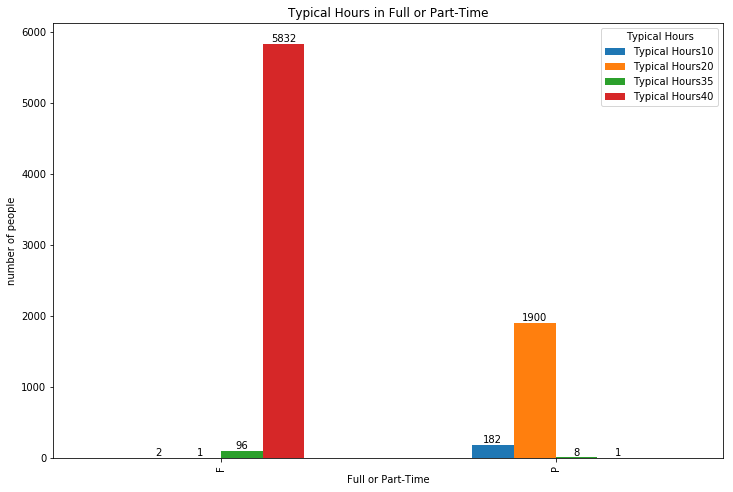

In [72]:
df_workinghours = df_Hourly.groupby(['Full or Part-Time','Typical Hours']).size().unstack(fill_value=0).add_prefix('Typical Hours')
p = df_workinghours.plot.bar(figsize=(12,8))
plt.title("Typical Hours in Full or Part-Time")
plt.ylabel("number of people")
#add the value of the dataframe into a list
list1 = [2,182,1,1900,96,8,5832,1]
i=0
rects = p.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(list1[i]), ha='center', va='bottom')
        i = i+1
        




### Conclusion: Substantially more people in Chicago work on a full time basis earning an annual salary. The highest average annual salary is in the DoIT industry whilst the highest hourly wage is in the health industry.

In [41]:
df_Hourly['yearly salary from the job'] = df_Hourly['Typical Hours']*df_Hourly['Typical Hours']*4*12

In [42]:
df_Hourly.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,yearly salary from the job
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20,19.86,19200
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40,46.10,76800
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40,35.60,76800
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20,2.65,19200
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20,17.68,19200


In [43]:
df_Hourly.groupby('Department')['yearly salary from the job'].mean()

Department
ANIMAL CONTRL            18442.105263
AVIATION                 75592.236599
BUDGET & MGMT            58800.000000
BUSINESS AFFAIRS         19200.000000
CITY COUNCIL             31462.500000
COMMUNITY DEVELOPMENT    29100.000000
CULTURAL AFFAIRS         58800.000000
FAMILY & SUPPORT         19400.696864
FINANCE                  74181.818182
FIRE                     76800.000000
GENERAL SERVICES         76800.000000
HEALTH                   58800.000000
HUMAN RESOURCES          39000.000000
LAW                      57810.000000
MAYOR'S OFFICE           53850.000000
OEMC                     21190.887667
POLICE                   19200.000000
PROCUREMENT              76800.000000
PUBLIC LIBRARY           21319.063545
STREETS & SAN            69897.744361
TRANSPORTN               76800.000000
WATER MGMNT              76800.000000
Name: yearly salary from the job, dtype: float64

Text(0, 0.5, 'Dollar')

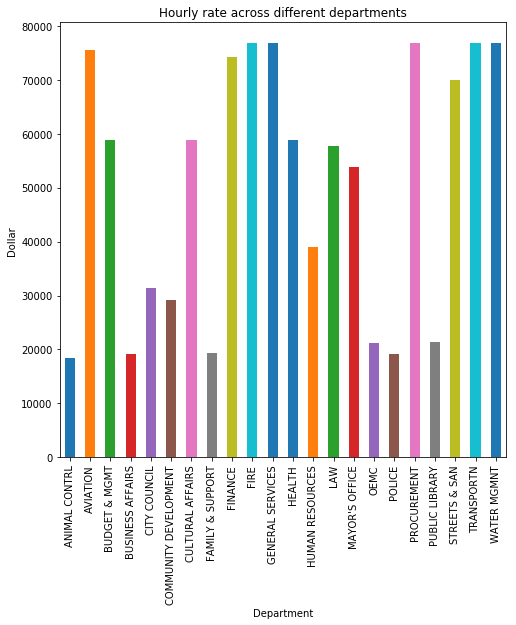

In [44]:
df_Hourly_Total = df_Hourly.groupby('Department')['yearly salary from the job'].mean()
df_Hourly_Total.plot.bar(figsize=(8,8))
plt.title("Hourly rate across different departments")
plt.ylabel("Dollar")

In [45]:
df_Hourly.groupby('Department')['yearly salary from the job'].count()

Department
ANIMAL CONTRL              19
AVIATION                 1082
BUDGET & MGMT               2
BUSINESS AFFAIRS            7
CITY COUNCIL               64
COMMUNITY DEVELOPMENT       4
CULTURAL AFFAIRS            7
FAMILY & SUPPORT          287
FINANCE                    44
FIRE                        2
GENERAL SERVICES          765
HEALTH                      3
HUMAN RESOURCES             4
LAW                        40
MAYOR'S OFFICE              8
OEMC                     1273
POLICE                     10
PROCUREMENT                 2
PUBLIC LIBRARY            299
STREETS & SAN            1862
TRANSPORTN                725
WATER MGMNT              1513
Name: yearly salary from the job, dtype: int64

In [46]:
index_list = []
for i in range(len(df_Hourly.groupby('Department')['yearly salary from the job'].count())):
    
    if df_Hourly.groupby('Department')['yearly salary from the job'].count()[i] < 5:
        
        index_list += [i]
        

approate_series = df_Hourly.groupby('Department')['yearly salary from the job'].count()

drop_list = []
for i in index_list:
    drop_list += [approate_series.index[i]]
    
print("those departments below have less than 5 count in the dataset")    
for i in drop_list:
    print(i)


        

those departments below have less than 5 count in the dataset
BUDGET & MGMT
COMMUNITY DEVELOPMENT
FIRE
HEALTH
HUMAN RESOURCES
PROCUREMENT


### drop those departments that are less reprensentative

In [47]:
df_Hourly_Total = df_Hourly_Total.drop(labels = drop_list)
print(df_Hourly_Total)

Department
ANIMAL CONTRL       18442.105263
AVIATION            75592.236599
BUSINESS AFFAIRS    19200.000000
CITY COUNCIL        31462.500000
CULTURAL AFFAIRS    58800.000000
FAMILY & SUPPORT    19400.696864
FINANCE             74181.818182
GENERAL SERVICES    76800.000000
LAW                 57810.000000
MAYOR'S OFFICE      53850.000000
OEMC                21190.887667
POLICE              19200.000000
PUBLIC LIBRARY      21319.063545
STREETS & SAN       69897.744361
TRANSPORTN          76800.000000
WATER MGMNT         76800.000000
Name: yearly salary from the job, dtype: float64


Text(0, 0.5, 'Dollar')

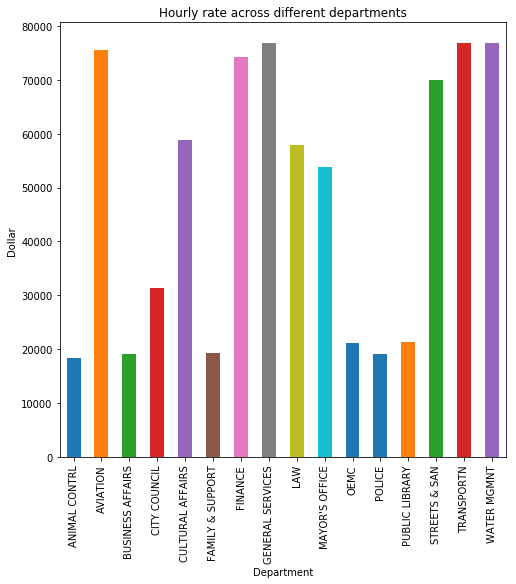

In [48]:
df_Hourly_Total.plot.bar(figsize=(8,8))
plt.title("Hourly rate across different departments")
plt.ylabel("Dollar")

In [49]:
df_Hourly_Total.max()

76800.0

In [50]:
df_Hourly_Total.idxmax()

'GENERAL SERVICES'

In [51]:
df_Hourly.mean()

Typical Hours                    34.507604
Hourly Rate                      32.788558
yearly salary from the job    61265.519820
dtype: float64

## Conclusion:
### (1) Becasue the dataset contain two different paid methods, one set is paid by salary the other is paid hourly, so we clean up the raw data, and divide the dataset into two sub datasets.
### (2) The salary in chicago has a wide range of salary, from not more than dollar salary up to 300000dollars in the dataset. and the average salary is 86786dollars.
### (3) As for all those jos paid by salary, in DOIT department has th highest salary and it is 99978dollars.
### (4) It is really rarely to find salary paid jobs to be a parttime job.
### (5) As for the hourly paid jobs full time part time ratio is about 4:1.
### (6) For the Hourly paid jobs, in the health department has the highest hourly rate that is up to 82dollars
### (7) From the boxplot we can tell that hourly paid jobs the hourly rate tend to be the same.
### (8) In order to make a comparsion with the Salary dataframe, we caculate the hourly paid rate into yearly paid salary.(typical hours X4(weeks) X12(monthes).
### (9) We clean up those less reprensentative departments that occurance is less than 5 times. then plot a new yearly paid graph.
### (10) As for those departments after the cleanup process, general service has the highest total salary that is 76800.
### (11) The max and mean of the hourly paid salary when count into year income are way less than the  yearly paid salary jobs.
## Finally we export the two subdatasets


In [73]:
save_df_to_csv(df_Hourly, "Hourly datafrom.csv")

In [74]:
save_df_to_csv(df_Salary,"Salary dataframe.csv")